# ANLY-590-01 _ HW1_ August 2019


---------------------------------------------------------------------------------------

NOTE: Before delving into questions, the following should be noted:

1. In this assignment I use the following packages which I need to import as follows:

In [26]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

2. Then we need to import Hittlers dataset using Python Panda package:

In [27]:
dataset = pd.read_csv("hitters.csv")

The question wants us to utilize numeric attributes to predict Salary amount. Having a deeper look at the hitters file, we figure it out that there are 'NaN' variables there. So, in order to be able to do prediction, we need to kind of get rid of these tuples (i.e., record). We could do this by simple setting a constraint on the table we have extracted before such that it picks those tuples that has infinite (numeric) Salary field.

In [28]:
dataset = dataset[np.isfinite(dataset['Salary'])]

Then we need to get rid of categorical features such as: League, Division, NewLeague and etc, as well as the attribute that we want to train a model on, and predict (i.e., Salary)

In [29]:
input_features = dataset.drop(["Unnamed: 0", "League",
                             "Division","NewLeague",
                             "Salary"],axis=1)
target = dataset["Salary"]

In [30]:
# higher the alpha value, more restriction on the coefficients; 
# while low alpha yields more generalization, coefficients are barely
# producing evenly-spaced 100 alpha values in the range of 5*10e-3 to 5*10e+9
alpha_values = 10**np.linspace(10,-2,100) * 0.5


from sklearn.model_selection import train_test_split
inp_train, inp_test , tgt_train, tgt_test = train_test_split(input_features, target, test_size=0.5, random_state=1)

# LASSO Regression

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.516704
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.000000
CRBI       0.208457
CWalks     0.000000
PutOuts    0.021337
Assists    0.000000
Errors     0.000000
dtype: float64
There are 3 features left: RBI, CRBI, PutOuts
Optimal value of regularization penalty: 2.24102
AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64
In its best model, Lasso regression selects 6 features to make its prediction.


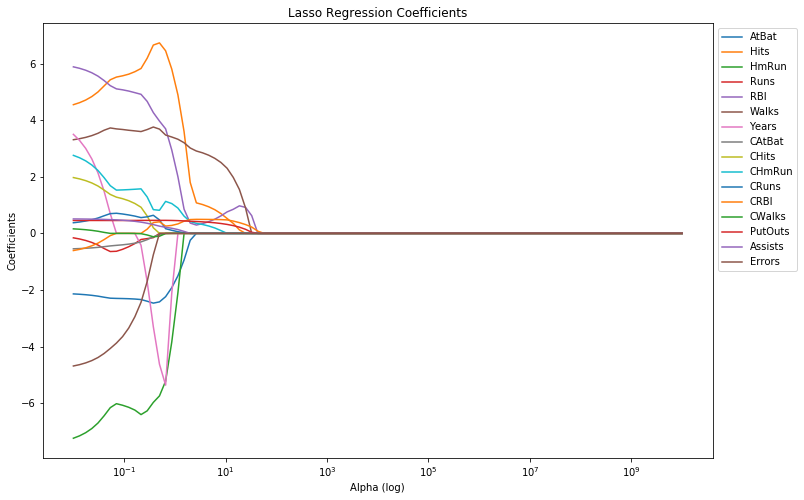

In [31]:
# randomizing the seed.
random.seed(1234)
lasso_reg = Lasso(max_iter=100000, normalize=True)
lasso_coeffs = []

# training lasso regression model with different alpha values
for alpha in alpha_values:
    #setting different alpha parameters
    lasso_reg.set_params(alpha=alpha)
    #training lasso regression model
    lasso_reg.fit(inp_train, tgt_train)
    lasso_coeffs.append(lasso_reg.coef_)
    
plt.figure(figsize = (12, 8))
ax = plt.gca()
ax.plot(alpha_values * 2, lasso_coeffs)
ax.set_xscale('log')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Alpha (log)')
plt.ylabel('Coefficients')
plt.legend(inp_train.columns, bbox_to_anchor=(1,1))


# Remaining features (left) in the model
lasso_reg = Lasso(alpha=17, max_iter = 10000, normalize = True)
lasso_reg.fit(inp_train, tgt_train)
print(pd.Series(lasso_reg.coef_, index=inp_train.columns))

print('There are 3 features left: RBI, CRBI, PutOuts')


# Finding optimal value of alpha using 10-folds CV
# Doing 10-folds cross validation
lassoreg_cv = LassoCV(max_iter = 10000, normalize = True, alphas = None, cv = 10)
# train cv model
lassoreg_cv.fit(inp_train, tgt_train)
lasso_reg.set_params(alpha=lassoreg_cv.alpha_)
print("Optimal value of regularization penalty: {:.5f}".format(lassoreg_cv.alpha_))
lasso_reg.fit(inp_train, tgt_train)
coeff = pd.Series(lasso_reg.coef_, index = inp_train.columns)
print(coeff)
selected_feats = [c for c in coeff if c != 0]
print("In its best model, Lasso regression selects {} features to make its prediction.".format(len(selected_feats)))

# Ridge Regression

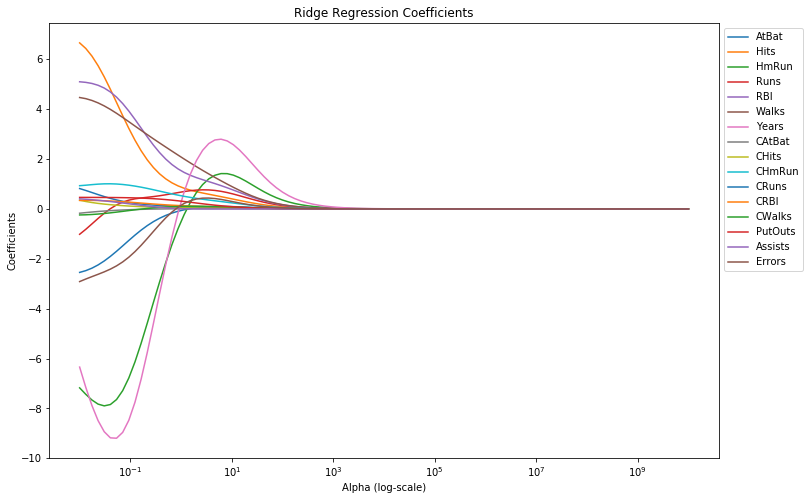

In [32]:
ridge_reg = Ridge(max_iter=1000, normalize=True)
ridge_coeffs = []

for alpha in alpha_values:
    ridge_reg.set_params(alpha=alpha)
    ridge_reg.fit(inp_train, tgt_train)
    ridge_coeffs.append(ridge_reg.coef_)

plt.figure(figsize = (12, 8))
ax = plt.gca()
ax.plot(alpha_values * 2, ridge_coeffs)
ax.set_xscale('log')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Alpha (log-scale)')
plt.ylabel('Coefficients')
plt.legend(inp_train.columns, bbox_to_anchor=(1,1))

In [49]:
ridge_cv = RidgeCV(normalize=True, cv=10, alphas=alpha_values)

ridge_cv.fit(inp_train, tgt_train)
print("Optimal value of regularization penalty: {:.5f}".format(ridge_cv.alpha_))

ridge_opt = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge_opt.fit(inp_train, tgt_train)
coeff_rg_best = pd.Series(ridge_opt.coef_, index = inp_train.columns)
print(coeff_rg_best)

Optimal value of regularization penalty: 1.75560
AtBat      0.087411
Hits       0.589157
HmRun      1.204435
Runs       0.762040
RBI        1.094727
Walks      1.402794
Years      2.621083
CAtBat     0.009067
CHits      0.042511
CHmRun     0.356864
CRuns      0.087702
CRBI       0.091905
CWalks     0.099764
PutOuts    0.177544
Assists   -0.001240
Errors     0.435859
dtype: float64


## 2.2 (Bias-Variance Tradeoff)

When we want to make an accurate model out of training data, we need to pay close attention to the model's bias and variance. Bias show the average error (distance) between the model's predictions and real values, whereas variance is a metric showing how far data are spread out from each other. There is alwaysa tradeoff between these two.

Model's with high bias pays little attention to training set and are unable to perform well on the test set (i.e., Underfitting). On the other hand, Models with high variance pays too much attention to training set, leading them to be unsuccessfull at generalizing the model on the test set (i.e., Overfitting). So, when creating a model, we have to consider the bias-variance tradeoff to prevent the model from being underfit and overfit. The following diagram represents the relationship between these two:

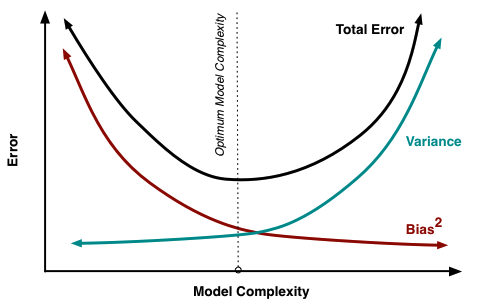

As shown in the diagram above, the optimal balance between Bias and Variance would never underfit/overfit

We simply use regularization to help find the optimal balance. In this sense, by using regularization, we actually aim to reduce the variance while shifting the bias up.